# importing Libraries & exploer data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv("/content/Hospital_Dataset_2020_2024.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   admission_date             8101 non-null   object 
 1   hospital_name              8101 non-null   object 
 2   admission_count            8101 non-null   int64  
 3   condition_type             8101 non-null   object 
 4   patient_age_group          8101 non-null   object 
 5   patient_gender             8101 non-null   object 
 6   readmission_count          8100 non-null   float64
 7   severity_level             8100 non-null   object 
 8   length_of_stay_avg         8100 non-null   float64
 9   seasonal_indicator         8100 non-null   object 
 10  comorbid_conditions_count  8100 non-null   float64
 11  primary_diagnosis_code     8100 non-null   object 
 12  daily_medication_dosage    8100 non-null   float64
 13  emergency_visit_count      8100 non-null   float

In [ ]:
df.head()

,admission_date,hospital_name,admission_count,condition_type,patient_age_group,patient_gender,readmission_count,severity_level,length_of_stay_avg,seasonal_indicator,comorbid_conditions_count,primary_diagnosis_code,daily_medication_dosage,emergency_visit_count
0,2020-01-01 00:00:00,Mecca City Hospital,1,Asthma,46-65,Female,0.0,Moderate,2.781828,Winter,1.0,Other,17.455517,2.0
1,2020-01-01 01:00:00,Dammam General Hospital,2,Asthma,0-17,Female,1.0,Mild,4.141432,Winter,0.0,Other,15.099498,3.0
2,2020-01-01 02:00:00,Mecca City Hospital,1,Asthma,46-65,Female,1.0,Moderate,8.507026,Winter,2.0,I21,23.087843,3.0
3,2020-01-01 03:00:00,Medina Specialist Hospital,3,Asthma,46-65,Male,0.0,Mild,4.622657,Winter,3.0,J45,25.247579,2.0
4,2020-01-01 04:00:00,Medina Specialist Hospital,5,COPD,18-45,Female,2.0,Moderate,5.818385,Winter,3.0,J45,18.255290,1.0


In [ ]:
df.describe()

,admission_count,readmission_count,length_of_stay_avg,comorbid_conditions_count,daily_medication_dosage,emergency_visit_count
count,8101.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000
mean,2.016294,0.496543,5.009262,2.005185,20.030596,1.001728
std,1.441700,0.710017,1.487572,1.422908,4.935474,0.989760
min,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000
25%,1.000000,0.000000,3.991430,1.000000,16.767615,0.000000
50%,2.000000,0.000000,4.999218,2.000000,20.056365,1.000000
75%,3.000000,1.000000,6.025770,3.000000,23.362906,2.000000
max,10.000000,5.000000,10.000000,10.000000,37.816722,6.000000


In [ ]:
df.isnull().sum()

,0
admission_date,0
hospital_name,0
admission_count,0
condition_type,0
patient_age_group,0
patient_gender,0
readmission_count,1
severity_level,1
length_of_stay_avg,1
seasonal_indicator,1


# preprocessing data & EDA For important columns

In [ ]:
df['admission_date'] = pd.to_datetime(df['admission_date'])
df['admission_date']

,admission_date
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
8096,2020-12-03 08:00:00
8097,2020-12-03 09:00:00
8098,2020-12-03 10:00:00
8099,2020-12-03 11:00:00


In [ ]:
df['admission_hour'] = df['admission_date'].dt.hour
df['admission_day'] = df['admission_date'].dt.day_name()
df['admission_month'] = df['admission_date'].dt.month
df['admission_is_weekend'] = df['admission_day'].isin(['Friday', 'Saturday']).astype(int)

In [ ]:
print(df[['admission_date', 'admission_hour', 'admission_day', 'admission_month', 'admission_is_weekend']].head())

       admission_date  admission_hour admission_day  admission_month  \
0 2020-01-01 00:00:00               0     Wednesday                1   
1 2020-01-01 01:00:00               1     Wednesday                1   
2 2020-01-01 02:00:00               2     Wednesday                1   
3 2020-01-01 03:00:00               3     Wednesday                1   
4 2020-01-01 04:00:00               4     Wednesday                1   

   admission_is_weekend  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  


In [ ]:
df['hospital_name'] = df['hospital_name'].str.lower().str.strip()


In [ ]:
df['hospital_name'] = df['hospital_name'].astype('category')
df['hospital_name'].head(10)


,hospital_name
0,mecca city hospital
1,dammam general hospital
2,mecca city hospital
3,medina specialist hospital
4,medina specialist hospital
5,dammam central hospital
6,king saud hospital
7,medina specialist hospital
8,jeddah national hospital
9,king saud hospital


In [ ]:
df['hospital_name'].cat.categories

Index(['dammam central hospital', 'dammam general hospital',
       'jeddah national hospital', 'king saud hospital', 'mecca city hospital',
       'medina specialist hospital', 'riyadh general hospital',
       'riyadh national hospital'],
      dtype='object')

In [ ]:
fig = px.histogram(df,
                   x='hospital_name',
                   y='admission_count',
                   title='Total Admissions per Hospital',
                   color='hospital_name',
                   color_discrete_sequence=px.colors.qualitative.Set2,
                   labels={'hospital_name':'Hospital', 'admission_count':'Number of Admissions'})

fig.update_layout(showlegend=False)
fig.show()

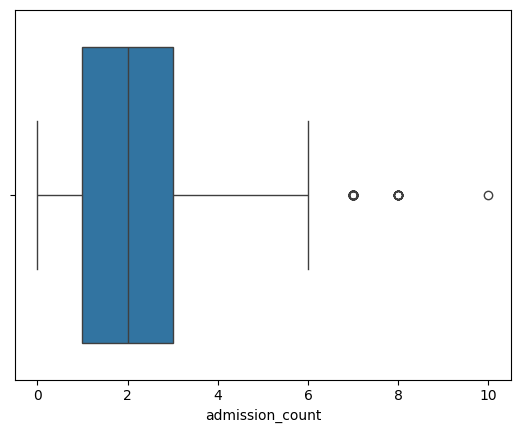

In [ ]:
sns.boxplot(x=df['admission_count'])
plt.show()

In [ ]:
Q1 = df['admission_count'].quantile(0.25)
Q3 = df['admission_count'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['admission_count'] >= Q1 - 1.5*IQR) & (df['admission_count'] <= Q3 + 1.5*IQR)]


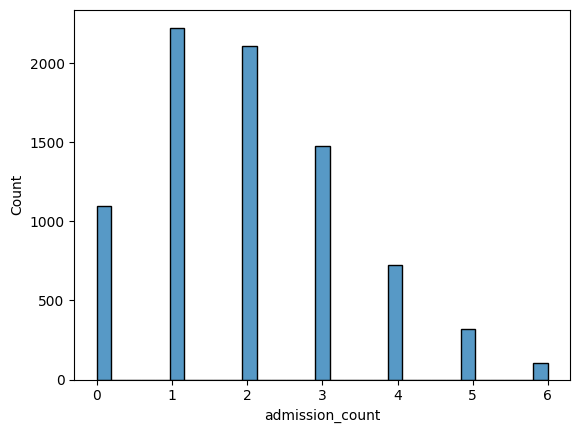

In [ ]:
sns.histplot(x=df['admission_count'])
plt.show()

In [ ]:
fig = px.histogram(df,
                   x='admission_day',
                   y='admission_count',
                   title='Total Admissions per day',
                   color='admission_day',
                   color_discrete_sequence=px.colors.qualitative.Set2,
                   labels={'admission_day':'day', 'admission_count':'Number of Admissions'})

fig.update_layout(showlegend=False)
fig.show()

In [ ]:
df['condition_type'] = df['condition_type'].str.lower().str.strip().str.title()


In [ ]:
df['condition_type'] = df['condition_type'].astype('category')


In [ ]:
rare_conditions = df['condition_type'].value_counts()[df['condition_type'].value_counts() < 50].index
df['condition_type'] = df['condition_type'].replace(rare_conditions, 'Other')


In [ ]:
condition_counts = df['condition_type'].value_counts()
print(condition_counts)


condition_type
Asthma                      4032
Copd                        1617
Other Respiratory Issues    1607
Heart Attack                 799
Name: count, dtype: int64


In [ ]:
px.histogram(df,
          x= 'condition_type' )

Asthma : الربو
copd : مرض الانسداد الرئوي المزمن
Heart Attack : النوبة القلبية
Other Respiratory Issues : مشاكل تنفسية أخرى

In [ ]:

df['patient_age_group'] = df['patient_age_group'].str.lower().str.strip().str.title()
df['patient_age_group'] = df['patient_age_group'].astype('category')



In [ ]:
df['patient_age_group']

,patient_age_group
0,46-65
1,0-17
2,46-65
3,46-65
4,18-45
...,...
8096,66+
8097,46-65
8098,0-17
8099,18-45


In [ ]:
#count plot for age group
px.histogram(df, x='patient_age_group', title='Distribution of Patients by Age Group')

In [ ]:
df['patient_gender']

,patient_gender
0,Female
1,Female
2,Female
3,Male
4,Female
...,...
8096,Male
8097,Male
8098,Female
8099,Male


In [ ]:
df['patient_gender'] = df['patient_gender'].str.lower().str.strip().str.title()
df['patient_gender'] = df['patient_gender'].astype('category')

In [ ]:
# plot of gender and relation admission num
px.histogram(df, x='patient_gender', y='admission_count', title='Admissions by Gender')

In [ ]:
df['severity_level'] = df['severity_level'].str.lower().str.strip().str.title()

df['severity_level'] = df['severity_level'].astype('category')

In [ ]:
# dengerous of patient and gender of it
px.histogram(df, x='severity_level', y='admission_count', title='Admissions by Severity Level', color = 'patient_gender')

In [ ]:
df['primary_diagnosis_code'] = df['primary_diagnosis_code'].str.upper().str.strip()
df['primary_diagnosis_code'] = df['primary_diagnosis_code'].astype('category')

In [ ]:
# raraly cods and isolaetion of it
rare_codes = df['primary_diagnosis_code'].value_counts()[df['primary_diagnosis_code'].value_counts() < 50].index
df['primary_diagnosis_code'] = df['primary_diagnosis_code'].replace(rare_codes, 'Other')


In [ ]:
df['primary_diagnosis_code'].unique()

['OTHER', 'I21', 'J45', 'J44', NaN]
Categories (4, object): ['I21', 'J44', 'J45', 'OTHER']

'I21' → Acute Myocardial Infarction (Heart Attack)
'J45' → Asthma
'J44' → Chronic Obstructive Pulmonary Disease (COPD)

In [ ]:
px.histogram(df, x='primary_diagnosis_code', y='admission_count', title='Admissions by Diagnosis Code', color ='patient_gender')

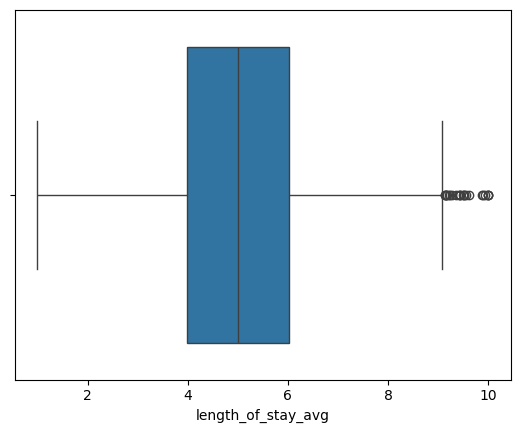

In [ ]:
sns.boxplot(x=df['length_of_stay_avg'])
plt.show()

In [ ]:
Q1 = df['length_of_stay_avg'].quantile(0.25)
Q3 = df['length_of_stay_avg'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['length_of_stay_avg'] >= Q1 - 1.5*IQR) & (df['length_of_stay_avg'] <= Q3 + 1.5*IQR)]

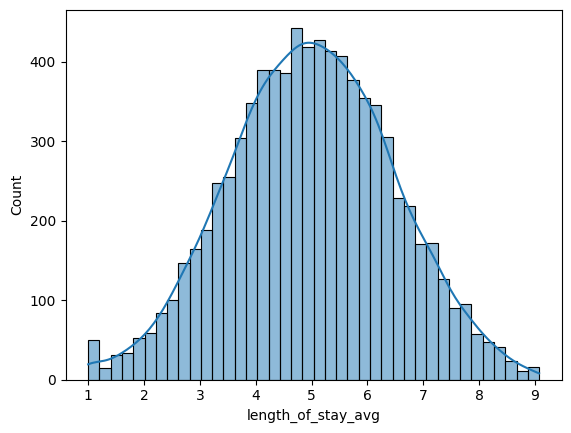

In [ ]:
# remove an outliers and the histplot come a normail destripution
sns.histplot(df['length_of_stay_avg'],kde=True)
plt.show()

In [ ]:
medication_by_diagnosis = df.groupby('primary_diagnosis_code')['daily_medication_dosage'].sum().reset_index()


medication_by_diagnosis = medication_by_diagnosis.sort_values(by='daily_medication_dosage', ascending=False)


/tmp/ipython-input-1519034878.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
fig = px.bar(
    medication_by_diagnosis,
    x='primary_diagnosis_code',
    y='daily_medication_dosage',
    title='Total Daily Medication Dosage by Diagnosis',
    labels={'primary_diagnosis_code':'Diagnosis Code', 'daily_medication_dosage':'Total Daily Dosage'} )
fig.show()

from this plot we see a ''J45'' the most diseases consuem drugs

In [ ]:
df['seasonal_indicator'] = df['seasonal_indicator'].str.lower().str.strip().str.title()
df['seasonal_indicator'] = df['seasonal_indicator'].astype('category')


In [ ]:
admissions_by_season = df.groupby('seasonal_indicator')['admission_count'].sum().reset_index()

/tmp/ipython-input-2967961475.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
fig = px.bar(
    admissions_by_season,
    x='seasonal_indicator',
    y='admission_count',
    title='Total Admissions by Season',
    labels={'seasonal_indicator':'Season', 'admission_count':'Total Admissions'},
    color_discrete_sequence=['darkorange']
)
fig.show()

 the tow season ( spring , summer) highst seasons of admissions

# DOWENLOAD DATA

In [ ]:

df.to_csv('Hospital_Cleaned_Data.csv', index=False)
